<a href="https://colab.research.google.com/github/IrawanRiyaldi/Irawan/blob/main/FINAL_PROJECT_HEXAGON_MULTICLASS%20done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT**

Data berisi observasi yang dilakukan oleh Sloan Digital Sky Survey (SDSS) dan memberikan informasi berharga tentang bintang, galaksi, dan quasar. Tugas ini bertujuan untuk mengklasifikasikan benda langit kedalam klasifikasi yang sesuai.

**Konteks**
Dalam astronomi, klasifikasi bintang adalah pengklasifikasian bintang berdasarkan karakteristik spektralnya. Skema klasifikasi galaksi, quasar, dan bintang adalah salah satu skema paling mendasar dalam astronomi. Pengkatalogan awal bintang-bintang dan distribusinya di langit telah membawa pada pemahaman bahwa mereka membentuk galaksi kita sendiri dan, mengikuti perbedaan bahwa Andromeda adalah galaksi yang terpisah dari galaksi kita, banyak galaksi mulai disurvei seiring dengan dibangunnya teleskop yang lebih canggih. . Datasat ini bertujuan untuk mengklasifikasikan bintang, galaksi, dan quasar berdasarkan karakteristik spektralnya.

**Isi**
Data tersebut terdiri dari 100.000 observasi luar angkasa yang dilakukan oleh SDSS (Sloan Digital Sky Survey). Setiap observasi dijelaskan oleh 17 kolom fitur dan 1 kolom kelas yang mengidentifikasinya sebagai bintang, galaksi, atau quasar.

1. obj_ID = Object Identifier, nilai unik yang mengidentifikasi objek dalam katalog gambar yang digunakan oleh CAS
2. alpha = Sudut Kenaikan Kanan (pada epoch J2000)
3. delta = Sudut deklinasi (pada epoch J2000)
4. u = Filter ultraviolet pada sistem fotometrik
5. g = Filter hijau pada sistem fotometrik
6. r = Filter merah pada sistem fotometrik
7. i = Filter Inframerah Dekat dalam sistem fotometrik
8. z = Filter inframerah dalam sistem fotometrik
9. run_ID = Nomor Proses yang digunakan untuk mengidentifikasi pemindaian tertentu
10. rereun_ID = Jalankan Ulang Nomor untuk menentukan cara pemrosesan gambar
11. cam_col = Kolom kamera untuk mengidentifikasi garis pindaian dalam proses
12. field_ID = Nomor bidang untuk mengidentifikasi setiap bidang
13. spec_obj_ID = ID unik yang digunakan untuk objek spektroskopi optik (artinya 2 pengamatan berbeda dengan spec_obj_ID yang sama harus berbagi kelas keluaran)
14. class = kelas objek (objek galaksi, bintang, atau quasar)
15. redshift = nilai pergeseran merah berdasarkan pertambahan panjang gelombang
16. plate = plate ID, mengidentifikasi setiap plate di SDSS
17. MJD = Tanggal Julian yang Dimodifikasi, digunakan untuk menunjukkan kapan suatu bagian data SDSS diambil
18. fiber_ID = fiber ID yang mengidentifikasi fiber yang mengarahkan cahaya pada bidang fokus pada setiap pengamatan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import xgboost as xgb
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = 'star_classification.csv'
search_path = '/content/drive/My Drive'
file = '/content/drive/MyDrive/star_classification.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(file)

In [ ]:
dataset

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
dataset.shape

(100000, 18)

#**EDA  (Exploratory Data Analysis)**

In [ ]:
dataset.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
dataset.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
dataset.isna().any()

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
rerun_ID       False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [ ]:
dataset['class'].nunique()

3

In [ ]:
dataset['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
dataset['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

# **DATA VISUALIZATION**

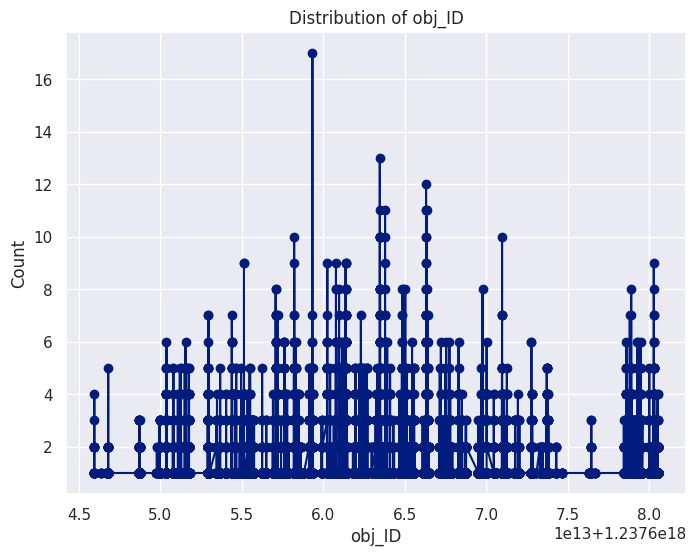

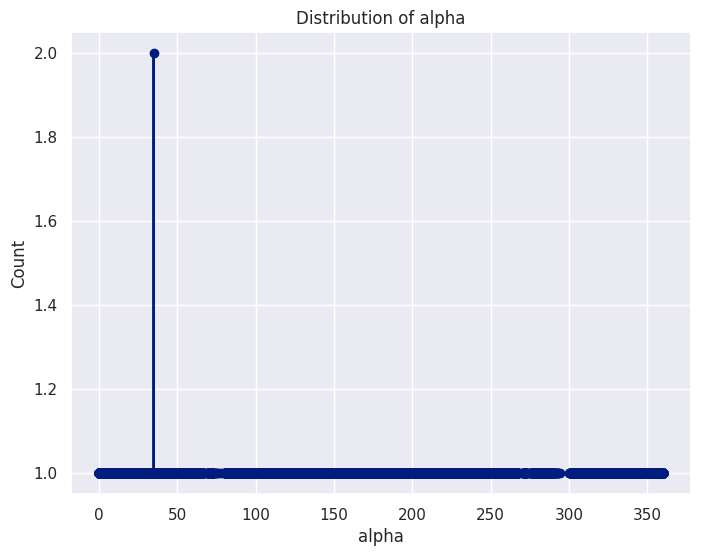

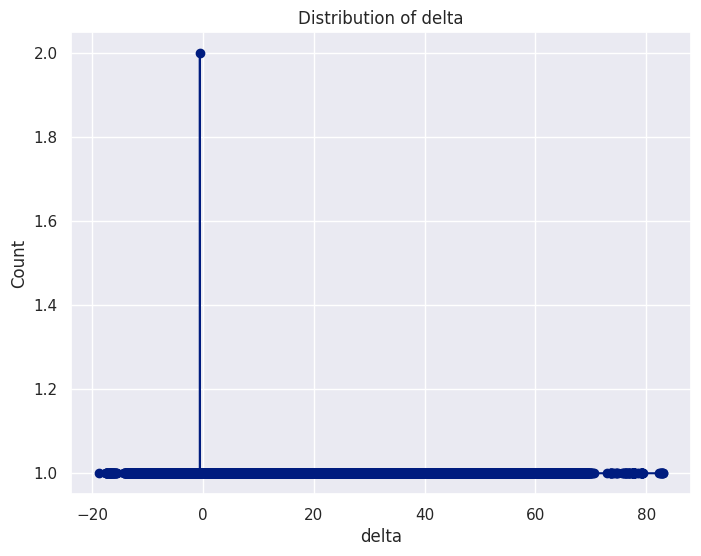

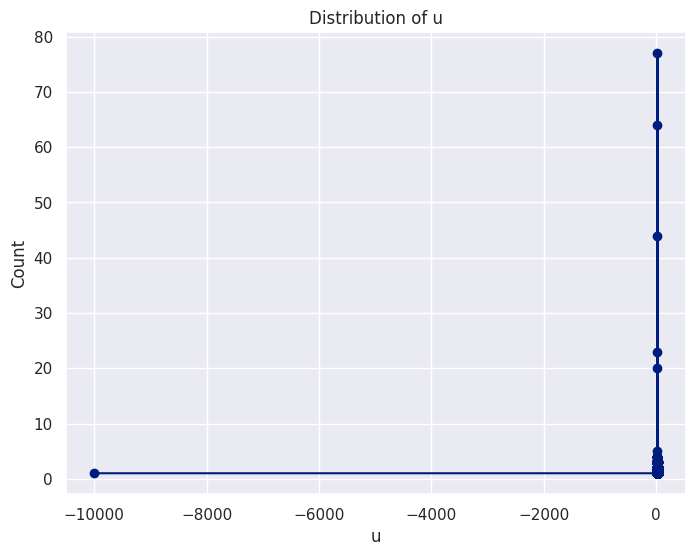

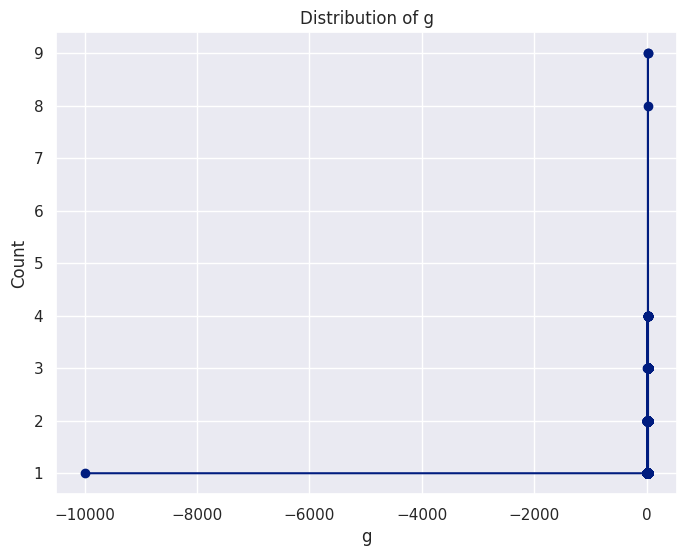

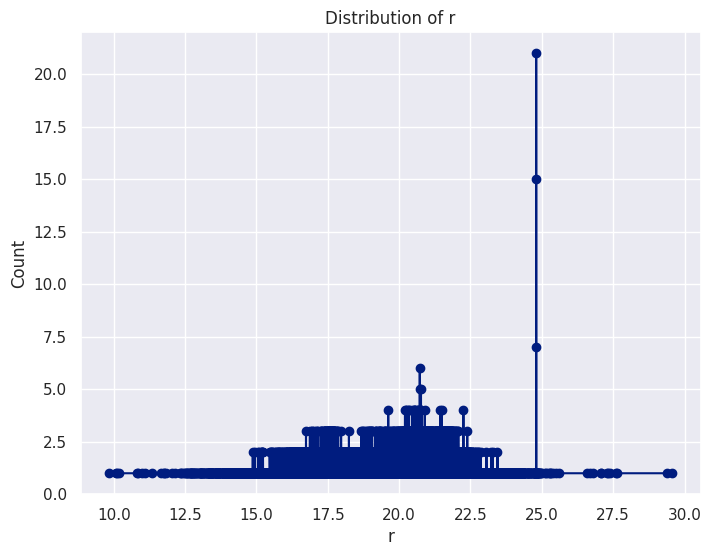

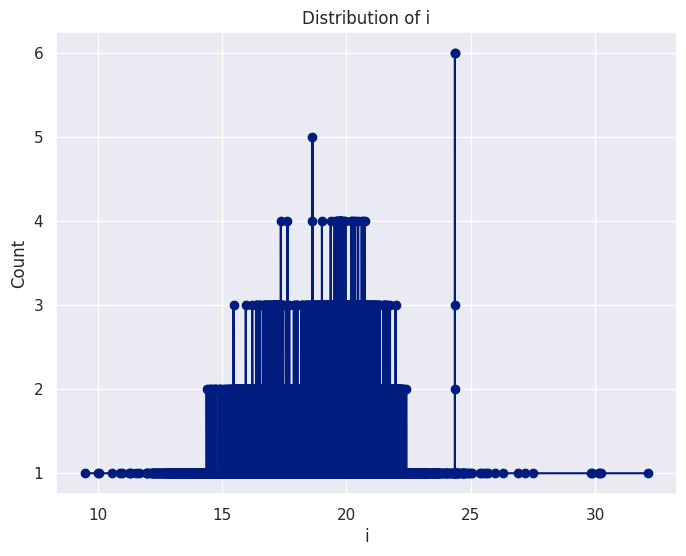

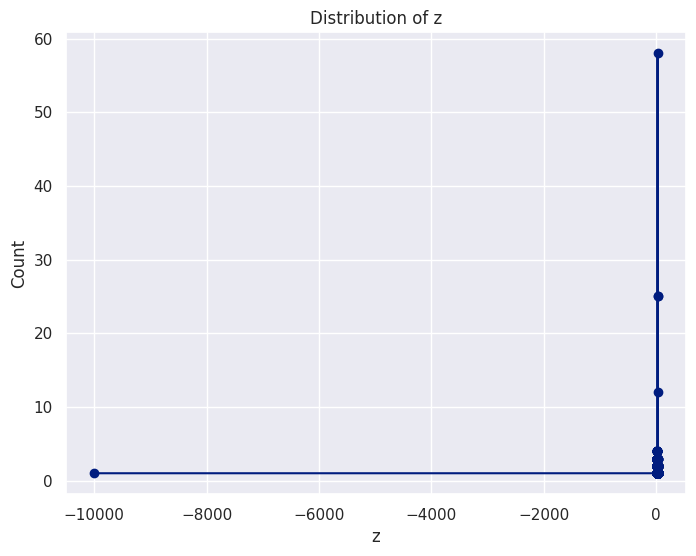

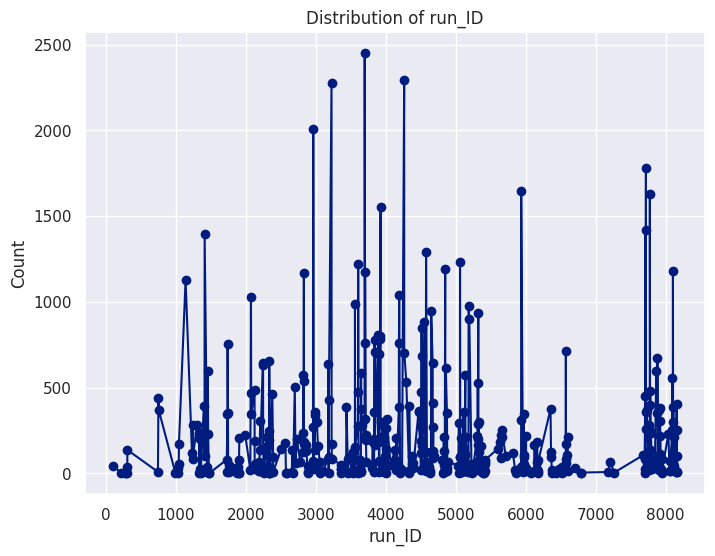

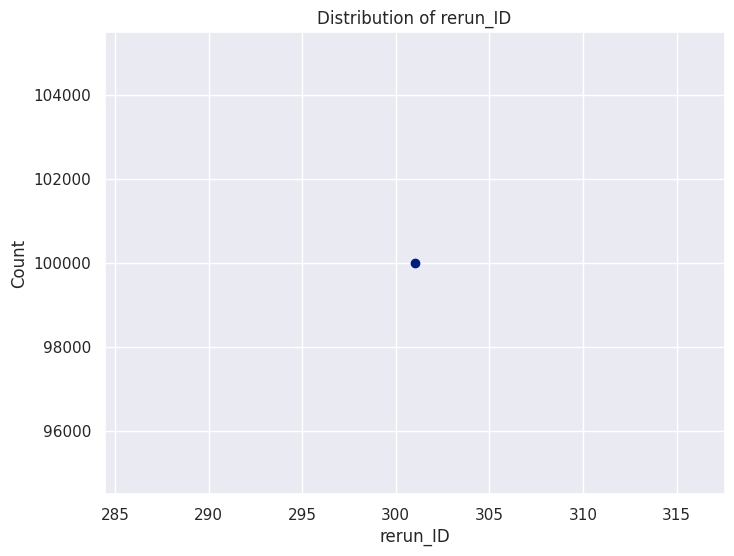

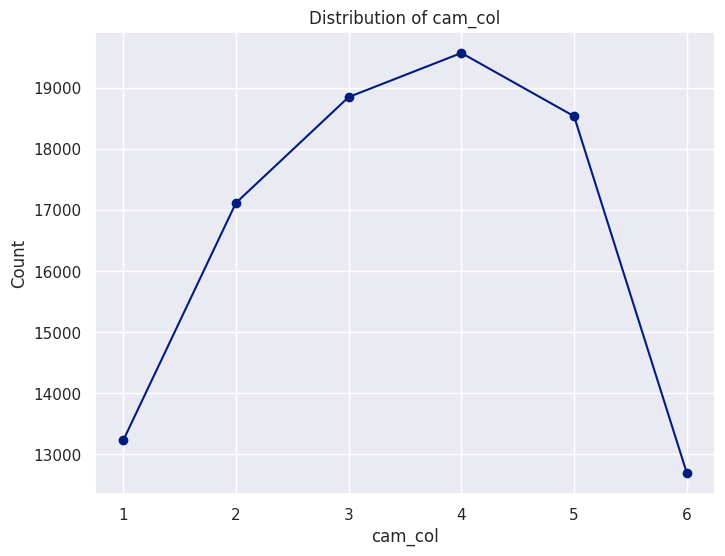

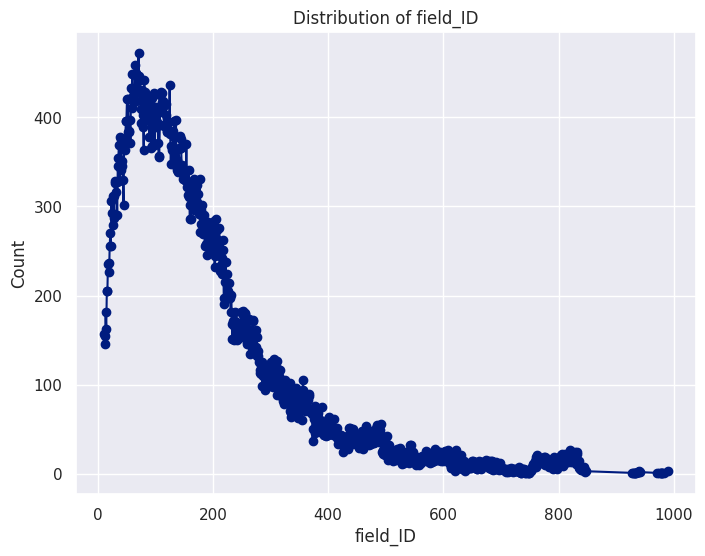

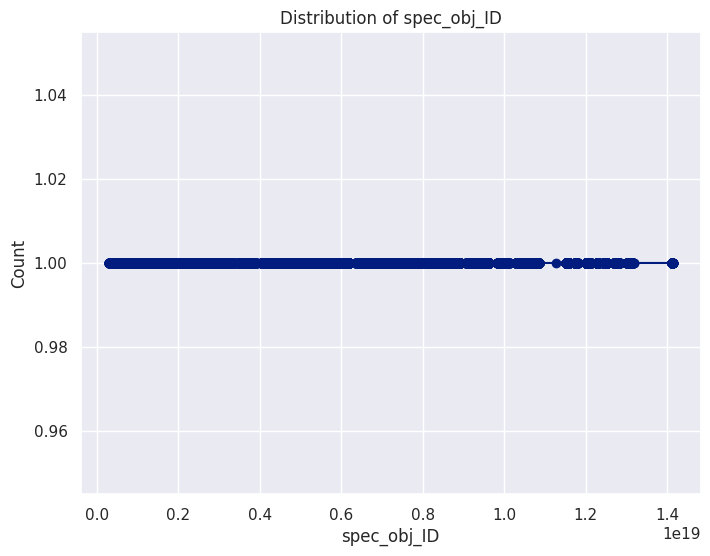

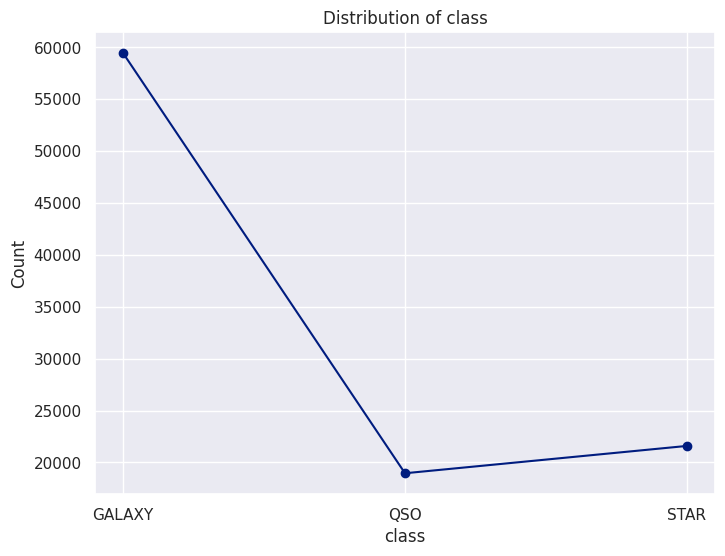

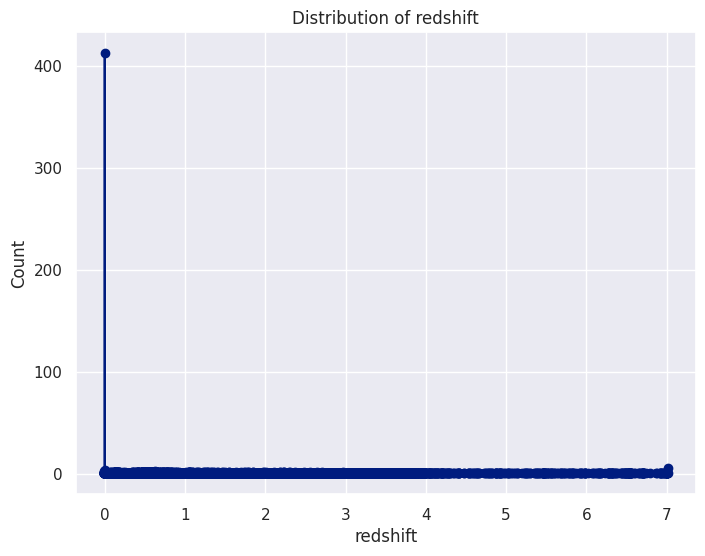

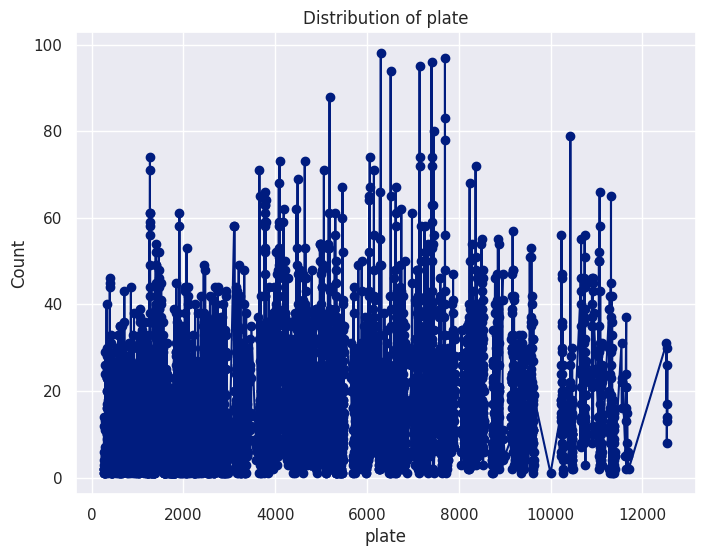

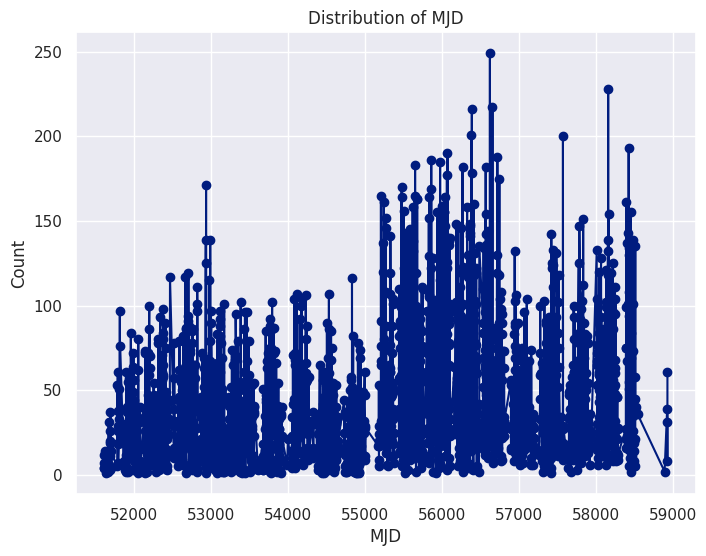

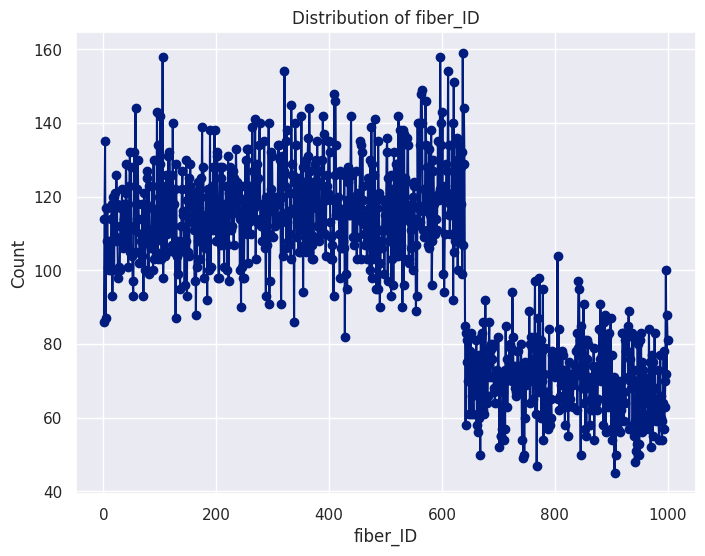

In [ ]:
for column_name in dataset.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(dataset[column_name].value_counts().sort_index().index, dataset[column_name].value_counts().sort_index().values, marker='o', linestyle='-')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.grid(True)
    plt.show()

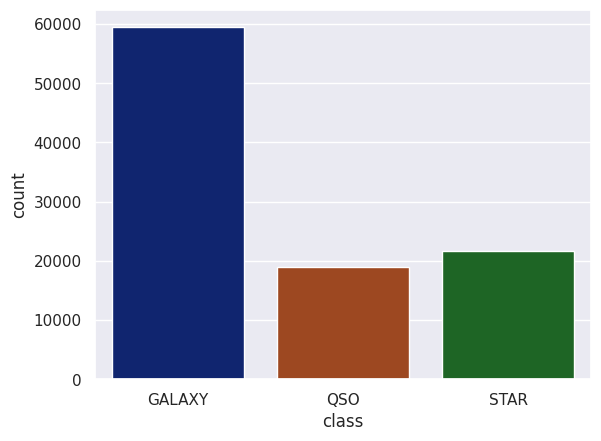

In [ ]:
sns.set(style='darkgrid', palette='dark')
sns.countplot(x = dataset['class'])
plt.show()

<ipython-input-59-68626cec06fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

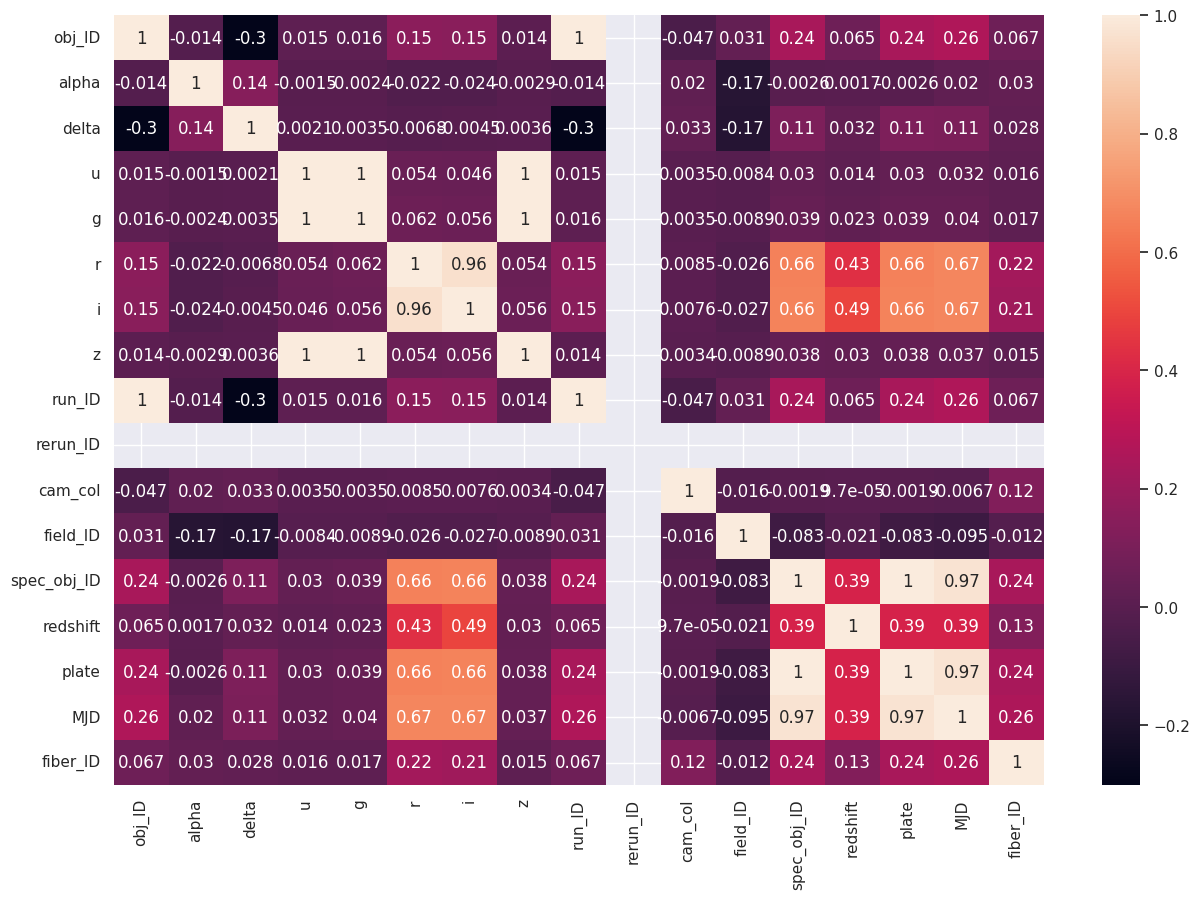

In [ ]:
plt.figure(figsize=(15,10))
corr = dataset.corr()
sns.heatmap(corr,annot=True)

In [ ]:
dataset['class']=dataset['class'].map({'GALAXY':0,'STAR':1,'QSO':2})

In [ ]:
dataset['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

# **PEMILIHAN FITUR**

In [ ]:
X = dataset[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'alpha', 'delta', 'fiber_ID']]
X

,u,g,r,i,z,redshift,plate,alpha,delta,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,135.689107,32.494632,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,144.826101,31.274185,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,142.188790,35.582444,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,338.741038,-0.402828,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,345.282593,21.183866,842
...,...,...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374,39.620709,-2.594074,438
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626,29.493819,19.798874,866
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764,224.587407,15.700707,74
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751,212.268621,46.660365,470


In [ ]:
y = dataset['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

# **RESAMPLE**

In [ ]:
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)
y.value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

In [ ]:
y_res.value_counts()

0    59445
2    59445
1    59445
Name: class, dtype: int64

# **Splitting Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30)

# **ALGORITMA KLASIFIKASI**

In [ ]:
score_dataset = pd.DataFrame(columns=['Algorithm', 'Recall score'])

***Random Forest***

In [ ]:
rf_dataset = pd.DataFrame(columns=['Estimators','Recall score'])

In [ ]:
for i in range(1,21):
    model = RandomForestClassifier(n_estimators = i, random_state = 30)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True)

rf_dataset

<ipython-input-69-fab7d78de510>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True)
<ipython-input-69-fab7d78de510>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True)
<ipython-input-69-fab7d78de510>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_dataset = rf_dataset.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')}, ignore_index = True)
<ipython-input-69-fab7d78de510>:5: FutureWarning: The frame.append method is

,Estimators,Recall score
0,1.0,0.966984
1,2.0,0.966692
2,3.0,0.978041
3,4.0,0.979230
4,5.0,0.980397
5,6.0,0.980890
6,7.0,0.981518
7,8.0,0.981922
8,9.0,0.981810
9,10.0,0.982124


In [ ]:
rf_dataset = rf_dataset.sort_values(by='Recall score', ascending = False)
rf_dataset.head()

,Estimators,Recall score
17,18.0,0.982460
16,17.0,0.982438
19,20.0,0.982325
15,16.0,0.982281
18,19.0,0.982236


In [ ]:
model = RandomForestClassifier(n_estimators = 18, random_state = 30)
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

In [ ]:
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
rf_score

0.982460075363359

In [ ]:
score_dataset = score_dataset.append({'Algorithm':'Random Forest', 'Recall score': rf_score}, ignore_index = True)
score_dataset

<ipython-input-73-c672b674af79>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'Random Forest', 'Recall score': rf_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.98246


**K-Nearest neighbors**

In [ ]:
knn_dataset = pd.DataFrame(columns=['Neighbors','Recall score'])

In [ ]:
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)

knn_dataset

<ipython-input-75-5c865e87b1d0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
<ipython-input-75-5c865e87b1d0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
<ipython-input-75-5c865e87b1d0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_dataset = knn_dataset.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)
<ipython-input-75-5c865e87b1d0>:5: FutureWarning: The frame.append method is deprecat

,Neighbors,Recall score
0,1.0,0.792504
1,2.0,0.748542
2,3.0,0.741477
3,4.0,0.726785
4,5.0,0.716423
5,6.0,0.709313
6,7.0,0.702539
7,8.0,0.698479
8,9.0,0.692334
9,10.0,0.688722


In [ ]:
knn_dataset = knn_dataset.sort_values(by='Recall score', ascending = False)
knn_dataset.head()

,Neighbors,Recall score
0,1.0,0.792504
1,2.0,0.748542
2,3.0,0.741477
3,4.0,0.726785
4,5.0,0.716423


In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

knn_score = recall_score(y_test, y_pred2, average='weighted')
print(knn_score)

0.7925040373228064


In [ ]:
score_dataset = score_dataset.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)
score_dataset

<ipython-input-78-4b44af709fb0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.982460
1,KNN,0.792504


**Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)

gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
gnb_score

0.5975686344877086

In [ ]:
score_dataset = score_dataset.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score}, ignore_index = True)
score_dataset

<ipython-input-80-255ab8d8ff66>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.982460
1,KNN,0.792504
2,GaussianNB,0.597569


**XGBoost (Extreme Gradient Boosting)**

In [ ]:
model = xgb.XGBClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred6 = model.predict(X_test)

xgb_score = recall_score(y_test, y_pred6, average = 'weighted')
xgb_score

0.9816750403732281

In [ ]:
score_dataset = score_dataset.append({'Algorithm':'XGBoost', 'Recall score':xgb_score}, ignore_index = True)
score_dataset

<ipython-input-82-5875a23cf108>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_dataset = score_dataset.append({'Algorithm':'XGBoost', 'Recall score':xgb_score}, ignore_index = True)


,Algorithm,Recall score
0,Random Forest,0.982460
1,KNN,0.792504
2,GaussianNB,0.597569
3,XGBoost,0.981675


In [ ]:
score_dataset = score_dataset.set_index('Recall score')
score_dataset

,Algorithm
Recall score,
0.982460,Random Forest
0.792504,KNN
0.597569,GaussianNB
0.981675,XGBoost


In [ ]:
score_dataset = score_dataset.sort_values(by = 'Recall score', ascending = False)
score_dataset

,Algorithm
Recall score,
0.982460,Random Forest
0.981675,XGBoost
0.792504,KNN
0.597569,GaussianNB


**ALGORITMA RANDOM FOREST (0.982460) MERUPAKAN MODEL YANG DIPILIH DIKARENAKAN MODEL INI LEBIH BAIK DALAM AKURASI DAN DAPAT MEMPREDIKSI LEBIH BAIK**

In [ ]:
joblib.dump(rf_score, 'rf_model.sav')

['rf_model.sav']

In [ ]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [ ]:
import pickle
import streamlit as st

In [ ]:
%%writefile app.py
import streamlit as st

def main():
        st.markdown( 'classify class into \GALAXY, QSO, STAR')
        st.header('class Features')

        st.text('u characteristics')
        u_value = st.slider('u_value')

        st.text('u characteristics')
        g_value = st.slider('g_value')

        st.text('r characteristics')
        r_value = st.slider('r_value')

        st.text('i characteristics')
        i_value = st.slider('i_value')

        st.text('z characteristics')
        z_value = st.slider('z_value')

        st.text('redshift characteristics')
        redshift_value = st.slider('redshift_value')

        st.text('plate characteristics')
        plate_value = st.slider('plate_value')

        st.text('alpha characteristics')
        alpha_value = st.slider('alpha_value')

        st.text('delta characteristics')
        delta_value = st.slider('delta_value')

        st.text('fiber_ID characteristics')
        fiber_ID_value = st.slider('fiber_ID_value')
        st.button('Predict type class')
if __name__ == '__main__':
	main()

Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.051s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.138.228.167


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.069s
your url is: https://tidy-things-listen.loca.lt
